## Observations and Insights 

1) Capomulin and Ramicane have the smallest average tumor size and the smallest SEM.
2) Capomulin and Ramicane also had the most total number of timepoints for all mice tested for each drug regimen
3) Average tumor volume and mouse weight are highly correlated.

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [62]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [63]:
# Checking the number of mice.
print(f'There are {merge_df["Mouse ID"].count()} entries')
print(f'There are {merge_df["Mouse ID"].nunique()} mice')

There are 1893 entries
There are 249 mice


In [64]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df['duplicates'] = merge_df.duplicated(subset=["Mouse ID", "Timepoint"], keep='first')
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicates
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [65]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = merge_df[merge_df['duplicates']==True]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicates
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [67]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df_clean = merge_df.drop(duplicate.index, axis=0)
merge_df_clean = merge_df_clean.drop(columns='duplicates')
merge_df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [68]:
# Checking the number of mice in the clean DataFrame.
print(f'There are {merge_df_clean["Mouse ID"].count()} entries')
print(f'There are {merge_df_clean["Mouse ID"].nunique()} mice')

There are 1888 entries
There are 249 mice


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_group = merge_df_clean.groupby(['Drug Regimen'])

mean = round(drug_group['Tumor Volume (mm3)'].mean(),2)
median = round(drug_group['Tumor Volume (mm3)'].median(),2)
variance = round(drug_group['Tumor Volume (mm3)'].var(),2)
std = round(drug_group['Tumor Volume (mm3)'].std(),2)
sem = round(drug_group['Tumor Volume (mm3)'].sem(),2)

summary_df = pd.DataFrame({'Mean Tumor Vol.': mean,
                           'Median Tumor Vol.': median,
                           'Tumor Vol. Variance': variance,
                           'Tumor Vol. Standard Deviation': std,
                           'SEM of Tumor Vol.': sem})

summary_df

,Mean Tumor Vol.,Median Tumor Vol.,Tumor Vol. Variance,Tumor Vol. Standard Deviation,SEM of Tumor Vol.
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

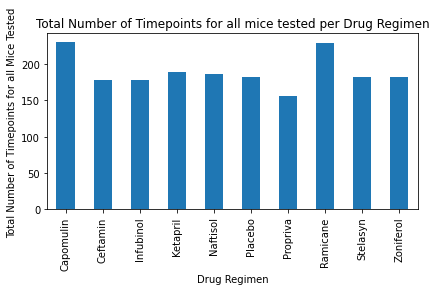

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_drugtested = drug_group['Timepoint'].count()
# timepoint_drugtested = timepoint_drugtested.set_index("Drug Regimen")

timepoint_drugtested.plot(kind="bar")
plt.title("Total Number of Timepoints for all mice tested per Drug Regimen")
plt.ylabel("Total Number of Timepoints for all Mice Tested")
plt.tight_layout()
plt.show()


drug_group['Timepoint'].count()

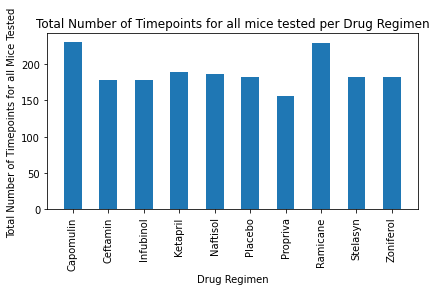

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = drug_group["Timepoint"].count()
x_axis = np.arange(len(y_axis.index))


plt.bar(x_axis, y_axis, width=0.5, align='center', )
plt.xticks(x_axis, y_axis.index, rotation='vertical')

plt.title("Total Number of Timepoints for all mice tested per Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel("Total Number of Timepoints for all Mice Tested")
plt.tight_layout()
plt.show()


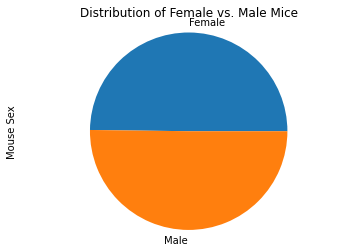

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_group = merge_df_clean.groupby(['Sex'])
sex_distribution = sex_group['Mouse ID'].nunique()

sex_pie = sex_distribution.plot(kind='pie', y=sex_distribution.index,
                                title="Distribution of Female vs. Male Mice")
sex_pie.set_ylabel("Mouse Sex")
plt.axis('equal')
plt.show()


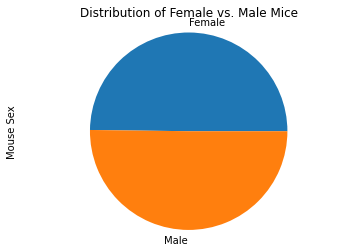

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_labels = sex_distribution.index
mouse_count = sex_distribution

plt.pie(mouse_count, labels=sex_labels)
plt.title("Distribution of Female vs. Male Mice")
plt.ylabel('Mouse Sex')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = merge_df_clean['Timepoint'].max()
reduced_df = merge_df_clean[['Timepoint', 'Mouse ID']]
last_timepoint_df = reduced_df[reduced_df['Timepoint']==last_timepoint]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_last_timepoint = pd.merge(last_timepoint_df, merge_df_clean, on=['Mouse ID','Timepoint'], how='left')

# drop drug regiems that are not Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_vol_top_treatment = tumor_vol_last_timepoint[(tumor_vol_last_timepoint['Drug Regimen']=='Capomulin') | (tumor_vol_last_timepoint['Drug Regimen']=='Ramicane') | (tumor_vol_last_timepoint['Drug Regimen']=='Infubinol') | (tumor_vol_last_timepoint['Drug Regimen']=='Ceftamin')]

tumor_vol_top_treatment

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...
121,45,x822,Ceftamin,Male,3,29,61.386660,3
122,45,y163,Infubinol,Female,17,27,67.685569,3
125,45,y769,Ceftamin,Female,6,27,68.594745,4
126,45,y865,Ceftamin,Male,23,26,64.729837,3


In [93]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = tumor_vol_top_treatment['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    if tumor_vol_top_treatment[tumor_vol_top_treatment['Drug Regimen']==drug]:
        tumor_vol.append(tumor_vol_top_treatment['Tumor Volume (mm3)']) 

tumor_vol
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

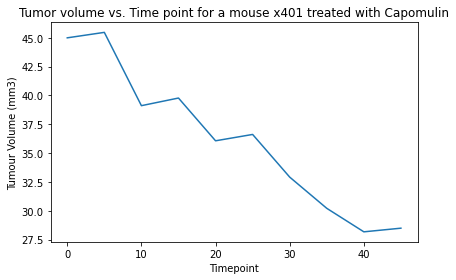

In [95]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouseID = 'x401'
capomulin_mouseID_df = merge_df_clean[merge_df_clean['Mouse ID']==capomulin_mouseID]
x_axis = capomulin_mouseID_df['Timepoint']
y_axis = capomulin_mouseID_df['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)
plt.title(f"Tumor volume vs. Time point for a mouse {capomulin_mouseID} treated with Capomulin")
plt.xlabel('Timepoint')
plt.ylabel("Tumour Volume (mm3)")
plt.tight_layout()
plt.show()

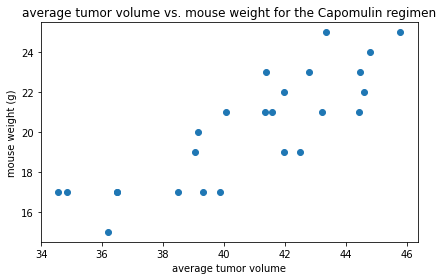

In [105]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_regimen = merge_df_clean[merge_df_clean['Drug Regimen']=='Capomulin']
mouse_group = capomulin_regimen.groupby(['Mouse ID'])
avg_tumor_vol = mouse_group['Tumor Volume (mm3)'].mean()
mouse_weight = mouse_group['Weight (g)'].mean()

plt.scatter(avg_tumor_vol, mouse_weight)
plt.title(f"average tumor volume vs. avg mouse weight for the Capomulin regimen")
plt.xlabel('average tumor volume')
plt.ylabel("mouse weight (g)")
plt.tight_layout()
plt.show()


## Correlation and Regression

The r-squared is: 0.7088568047708717


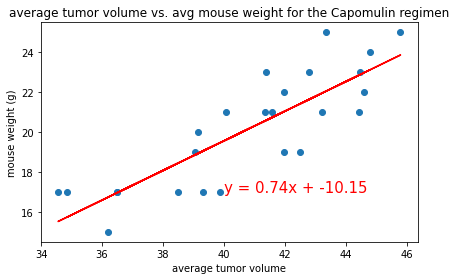

In [118]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumor_vol, mouse_weight)
regress_values = avg_tumor_vol * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(avg_tumor_vol, mouse_weight)
plt.plot(avg_tumor_vol,regress_values,"r-")
plt.title(f"average tumor volume vs. avg mouse weight for the Capomulin regimen")
plt.xlabel('average tumor volume')
plt.ylabel("mouse weight (g)")
plt.tight_layout()
plt.annotate(line_eq,(40,17),fontsize=15,color="red")
plt.show()